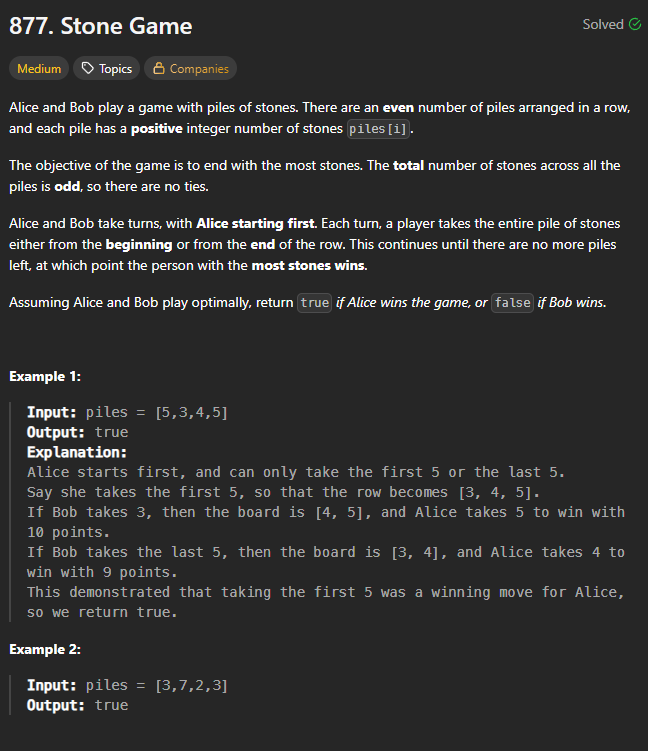

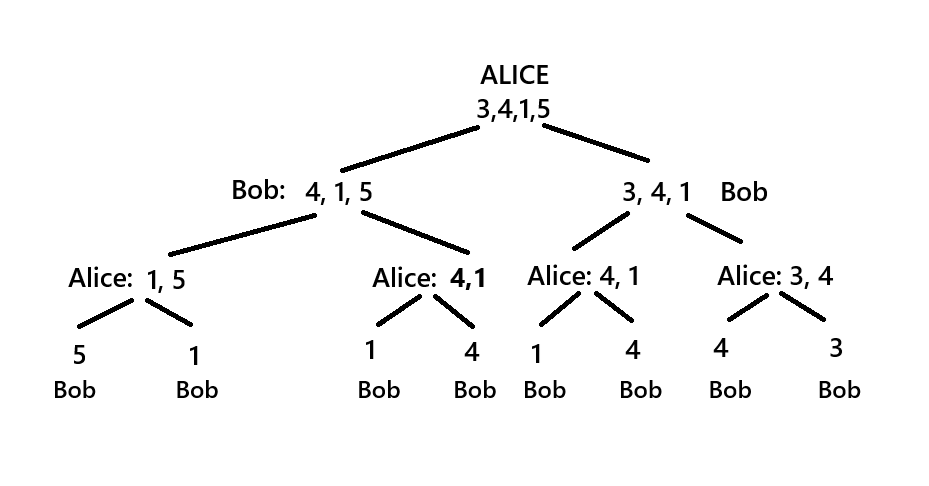

# Recursion

In [ ]:
class Solution:
    def stoneGame(self, piles: List[int]) -> bool:

        def helper(stones=piles, Alice=True):
            if len(stones) == 0:
                return 0

            if Alice:
                take_first = stones[0] + helper(stones[1:], False)
                take_last = stones[-1] + helper(stones[:-1], False)
                return max(take_first, take_last)
            else:
                take_first = helper(stones[1:], True)
                take_last = helper(stones[:-1], True)
                return min(take_first, take_last)

        return helper() > sum(piles) // 2


# Memoization

In [ ]:
class Solution:
    def stoneGame(self, piles: List[int]) -> bool:
        memo = {}

        def helper(i, j, Alice):
            if i > j:
                return 0

            key = (i, j, Alice)
            if key in memo:
                return memo[key]

            if Alice:
                take_first = piles[i] + helper(i + 1, j, False)
                take_last = piles[j] + helper(i, j - 1, False)
                result = max(take_first, take_last)
            else:
                take_first = helper(i + 1, j, True)
                take_last = helper(i, j - 1, True)
                result = min(take_first, take_last)

            memo[key] = result
            return result

        return helper(0, len(piles) - 1, True) > sum(piles) // 2
